### 让我们用以前学习过的知识，来对美国每一年的人口出生数据进行统计分析

- 通过本次分享，你将有机会巩固以下知识：
	- 在图像中添加文字
	- 创建透视表
	- 日期时间类型的转换

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
# 读取原始数据
path = '/root/data_analysis/datas/births.csv'
births = pd.read_csv(path)
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
births['year'].dtype
births['month'].dtype
births['day'].dtype

dtype('float64')

#### 读取原始数据 下面是根据统计学的一些原理，过滤数据，我不懂，请大虾指导

In [4]:
quartiles = np.percentile(births['births'],[25,50,75])
quartiles

array([4358. , 4814. , 5289.5])

In [5]:
mu,sig = quartiles[1],0.74*(quartiles[2]-quartiles[0])
births = births.query('(births>@mu-5*@sig)&(births<@mu+5*@sig)')

In [6]:
births.head(3)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454


In [7]:
# 将day行由float转换为int，再创建时间类型的index
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000*births['year']+100*births['month']+births['day'],format='%Y%m%d')

In [8]:
births.head(3)

,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454


In [9]:
# 创建时间间隔类类型的数据
index2 = pd.PeriodIndex(year=births["year"],month=births["month"],day=births["day"],freq="D")
index2

PeriodIndex(['1969-01-01', '1969-01-01', '1969-01-02', '1969-01-02',
             '1969-01-03', '1969-01-03', '1969-01-04', '1969-01-04',
             '1969-01-05', '1969-01-05',
             ...
             '1988-12-27', '1988-12-27', '1988-12-28', '1988-12-28',
             '1988-12-29', '1988-12-29', '1988-12-30', '1988-12-30',
             '1988-12-31', '1988-12-31'],
            dtype='period[D]', length=14610, freq='D')

In [10]:
list(births.index)[:3]

[Timestamp('1969-01-01 00:00:00'),
 Timestamp('1969-01-01 00:00:00'),
 Timestamp('1969-01-02 00:00:00')]

In [11]:
list(index2)[:3]

[Period('1969-01-01', 'D'),
 Period('1969-01-01', 'D'),
 Period('1969-01-02', 'D')]

In [12]:
# 创建针对births这一列的透视表
births_by_date = births.pivot_table('births',[births.index.month,births.index.day],aggfunc='mean')
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [13]:
births_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
   6   4668.150
   7   4706.925
   8   4629.650
   9   4537.775
   10  4591.700
   11  4675.150
   12  4700.800
   13  4730.050
   14  4816.200
   15  4733.650
   16  4665.025
   17  4654.650
   18  4707.325
   19  4731.525
   20  4767.525
   21  4790.250
   22  4742.800
   23  4666.750
   24  4653.200
   25  4698.000
   26  4715.900
   27  4747.025
   28  4771.800
   29  4702.300
   30  4644.225
...         ...
12 2   4830.300
   3   4758.500
   4   4718.725
   5   4734.675
   6   4683.050
   7   4704.325
   8   4803.800
   9   4793.825
   10  4785.325
   11  4738.500
   12  4791.300
   13  4676.675
   14  4792.100
   15  4920.800
   16  4968.100
   17  4951.600
   18  4936.375
   19  4962.925
   20  4877.025
   21  4816.100
   22  4661.925
   23  4466.675
   24  4126.250
   25  3844.450
   26  4383.525
   27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [14]:
# 重新构建透视表的index，假设其为2012年整年的数据
births_by_date.index = [ pd.datetime(2012,month,day) for (month,day) in births_by_date.index ]
births_by_date.index.freq = 'D'

In [15]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


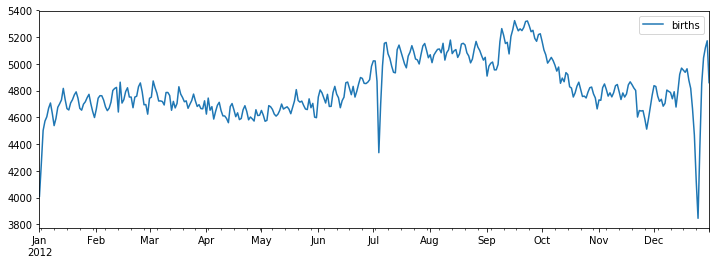

In [16]:
# 绘制2012年每一天的生育率折线图
fig,ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

Text(2012-9-4, 4850, 'labor day')

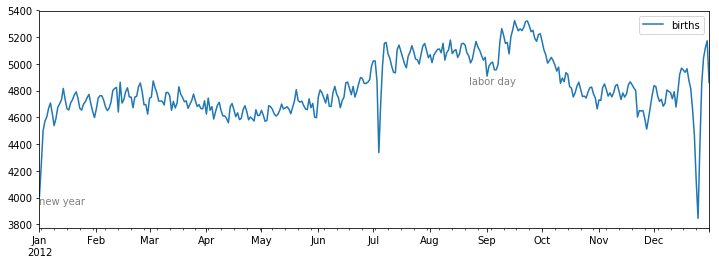

In [17]:
# 为图像添加文字
fig,ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)
style = {'size':10,'color':'gray'}
ax.text('2012-1-1',3950,'new year',ha='left',**style)
ax.text('2012-9-4',4850,'labor day',ha='center',**style)

#### 附赠一个为图像添加箭头指示文字的示例

Text(2, -4, 'local minimum')

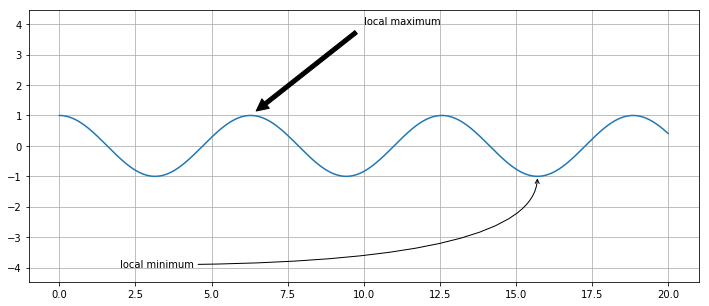

In [18]:
fig,ax = plt.subplots(figsize=(12,5))
x = np.linspace(0,20,1000)
ax.plot(x,np.cos(x))
ax.axis('equal')
ax.grid()

ax.annotate('local maximum',xy=(6.28,1),xytext=(10,4),arrowprops={'facecolor':'black','shrink':0.05})
ax.annotate('local minimum',xy=(5*np.pi,-1),xytext=(2,-4),arrowprops={'arrowstyle':'->','connectionstyle':'angle3,angleA=0,angleB=-90'})